In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
bottle_df = pd.read_csv("bottle.csv")
cast_df = pd.read_csv("cast.csv")

print("Bottle shape:", bottle_df.shape)
print("Cast shape:", cast_df.shape)

C:\Users\Dmytro\AppData\Local\Temp\ipykernel_33232\663487599.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  bottle_df = pd.read_csv("bottle.csv")


Bottle shape: (864863, 74)
Cast shape: (34404, 61)


C:\Users\Dmytro\AppData\Local\Temp\ipykernel_33232\663487599.py:2: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  cast_df = pd.read_csv("cast.csv")


In [3]:
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cast_df.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [5]:
merged_df = pd.merge(
    bottle_df,
    cast_df[['Cst_Cnt', 'Date', 'Lat_Dec', 'Lon_Dec']],
    on='Cst_Cnt',
    how='left'
)

In [6]:
print("Merged shape:", merged_df.shape)
merged_df.head()

Merged shape: (864863, 77)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment,Date,Lat_Dec,Lon_Dec
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03/01/1949,38.833333,-124.083333
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03/01/1949,38.833333,-124.083333
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03/01/1949,38.833333,-124.083333
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03/01/1949,38.833333,-124.083333
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03/01/1949,38.833333,-124.083333


In [7]:
df = merged_df.dropna(subset=['T_degC', 'Salnty', 'Depthm', 'Lat_Dec', 'Lon_Dec'])

In [8]:
features = ['Lat_Dec', 'Lon_Dec', 'Depthm', 'Salnty']

In [9]:
threshold = df['T_degC'].median()
df['T_above_median'] = (df['T_degC'] > threshold).astype(int)
X = df[features]
y = df['T_above_median']

C:\Users\Dmytro\AppData\Local\Temp\ipykernel_33232\8994777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['T_above_median'] = (df['T_degC'] > threshold).astype(int)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [14]:
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train_s, y_train)

y_pred = clf.predict(X_test_s)

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nКласифікаційний звіт:\n", classification_report(y_test, y_pred))

Accuracy: 0.9589499539453484

Класифікаційний звіт:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     81490
           1       0.96      0.96      0.96     81360

    accuracy                           0.96    162850
   macro avg       0.96      0.96      0.96    162850
weighted avg       0.96      0.96      0.96    162850



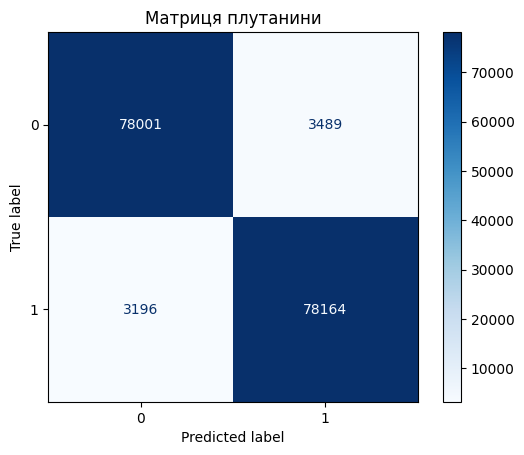

In [16]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Матриця плутанини")
plt.show()

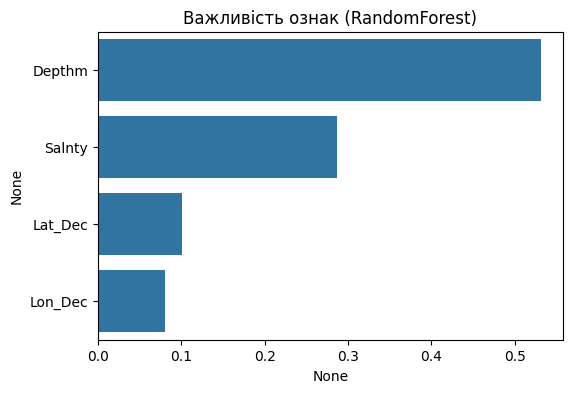

In [17]:
importances = clf.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Важливість ознак (RandomForest)")
plt.show()

In [18]:
feat_imp

Depthm     0.531299
Salnty     0.287021
Lat_Dec    0.101113
Lon_Dec    0.080567
dtype: float64

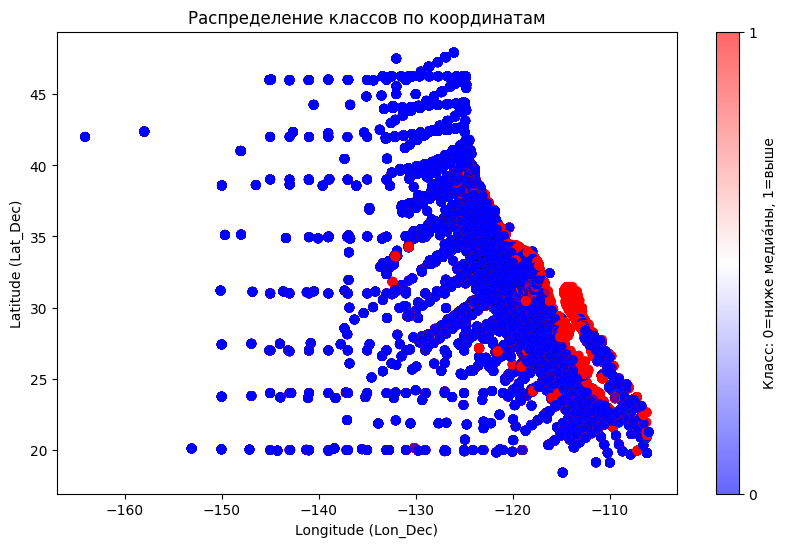

In [19]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['Lon_Dec'], df['Lat_Dec'], 
    c=df['T_above_median'], cmap='bwr', alpha=0.6
)
plt.colorbar(scatter, ticks=[0,1], label="Класс: 0=ниже медиа́ны, 1=выше")
plt.xlabel("Longitude (Lon_Dec)")
plt.ylabel("Latitude (Lat_Dec)")
plt.title("Распределение классов по координатам")
plt.show()